# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
display(X.shape, y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [4]:
import matplotlib.pyplot as plt

x = X.reshape(-1,28,28)

def plot_number(number):
    
    return plt.imshow(number, cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

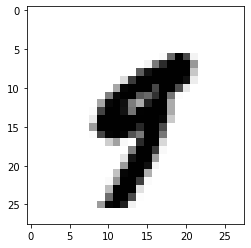

In [5]:
plot_number(x[36000])

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
train_numbers_X = x[:60000]
test_numbers_X = x[60000:]

train_numbers_y = y[:60000].astype(np.float)
test_numbers_y = y[60000:].astype(np.float)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [7]:
import tensorflow as tf
import collections, numpy


train_numbers_y = [i if i==5 else 0 for i in train_numbers_y]
train_numbers_y = np.array(train_numbers_y)
test_numbers_y = [i if i==5 else 0 for i in test_numbers_y]
test_numbers_y = np.array(test_numbers_y)

#train_numbers_X = train_numbers_X.reshape(-1, 28, 28, 1)
#test_numbers_X = test_numbers_X.reshape(-1, 28, 28, 1)

collections.Counter(test_numbers_y)

/Applications/anaconda3/envs/ironhack/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/envs/ironhack/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/envs/ironhack/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/envs/ironhack

Counter({0.0: 9108, 5.0: 892})

In [8]:
train_numbers_X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
nsamples, nx, ny = train_numbers_X.shape
train_dataset = train_numbers_X.reshape((nsamples,nx*ny))
tsamples, tx, ty = test_numbers_X.shape
test_dataset = test_numbers_X.reshape((tsamples,tx*ty))

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(train_dataset, train_numbers_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model.predict(train_dataset)

array([5., 0., 0., ..., 5., 0., 0.])

In [11]:
model.score(train_dataset, train_numbers_y)

0.9782666666666666

### Does the classifier predict correctly the 36000th digit we picked before?

In [12]:
model.predict(train_dataset)[36000]==train_numbers_y[36000]

True

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [14]:
model2=never_5_clf.fit(train_dataset, train_numbers_y)
never_5_clf.predict(train_dataset)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
# Confusion matrix
display(confusion_matrix(test_numbers_y, model.predict(test_dataset)))
display(confusion_matrix(test_numbers_y, never_5_clf.predict(test_dataset)))

array([[9026,   82],
       [ 145,  747]])

array([[9108,    0],
       [ 892,    0]])

In [16]:
#Precision
display(precision_score(test_numbers_y, model.predict(test_dataset), average='weighted'))
display(precision_score(test_numbers_y, never_5_clf.predict(test_dataset), average='weighted'))

0.9767764470240343

/Applications/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.82955664

In [17]:
# Recal 
display(recall_score(test_numbers_y, model.predict(test_dataset),pos_label=5))
display(recall_score(test_numbers_y, never_5_clf.predict(test_dataset),pos_label=5))

0.8374439461883408

0.0

In [18]:
# F1
display(f1_score(test_numbers_y, model.predict(test_dataset),pos_label=5))
display(f1_score(test_numbers_y, never_5_clf.predict(test_dataset),pos_label=5))

0.8680999418942476

/Applications/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

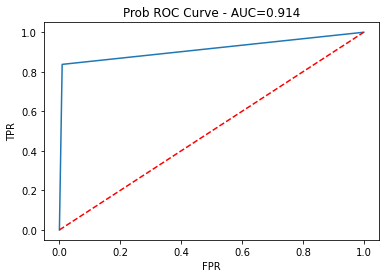

In [19]:
y_pred=model.predict(test_dataset)

fpr, tpr, thresholds = roc_curve(test_numbers_y, y_pred,pos_label=5)
a = roc_auc_score(test_numbers_y, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show()

### Now find the roc_auc_score for each. 

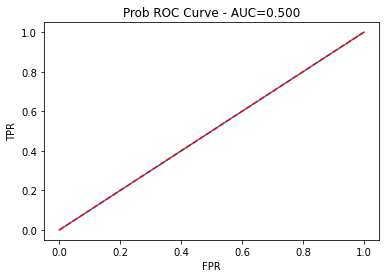

In [20]:
y_pred=never_5_clf.predict(test_dataset)

fpr, tpr, thresholds = roc_curve(test_numbers_y, y_pred,pos_label=5)
a = roc_auc_score(test_numbers_y, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();

### What does this metric tell you? Which classifier works better with this metric in mind?